In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

****读取数据****

In [2]:
train_df = pd.read_csv('./dataset/train.csv')
train_label = pd.read_csv('./dataset/train_label_coordinates.csv')
train_description = pd.read_csv('./dataset/train_series_descriptions.csv')

In [3]:
# train.csv和train_label_coordinates.csv 合并
df_train_step_1 = pd.merge(left=train_label, right=train_df, how='left', on='study_id').reset_index(drop=True)
df_train_step_1.head()

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild


In [4]:
# df_train_step_1和train_series_descriptions.csv 合并
df_train = pd.merge(left=df_train_step_1, right=train_description, how='left', on=['study_id', 'series_id']).reset_index(drop=True)
df_train.head()

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR


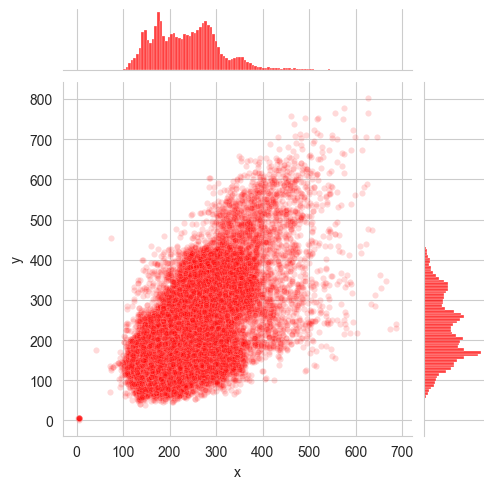

In [5]:
sns.jointplot(data=df_train, x='x', y='y', color='red', s = 20, alpha=0.15, height=5)
plt.grid(True)
plt.show()

****Condition****

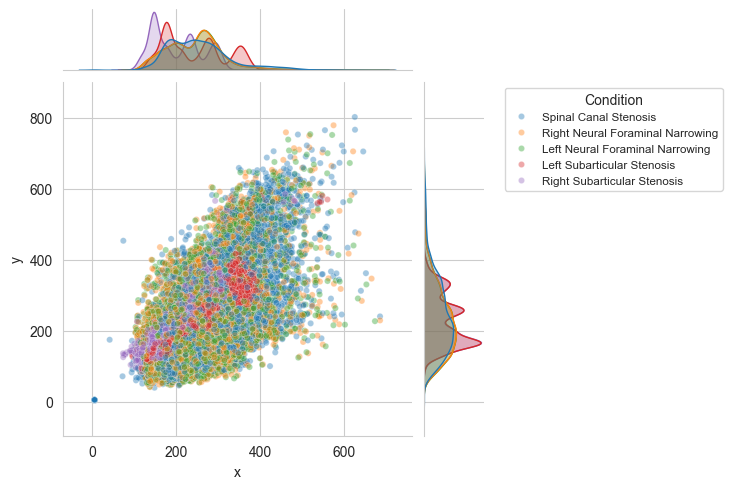

In [6]:
sns.jointplot(data=df_train, x='x', y='y',hue='condition', color='red', s = 20, alpha=0.4, height=5)
plt.legend(title='Condition', bbox_to_anchor=(1.25, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

C:\Users\GGbond\AppData\Local\Temp\ipykernel_15672\2725762407.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')


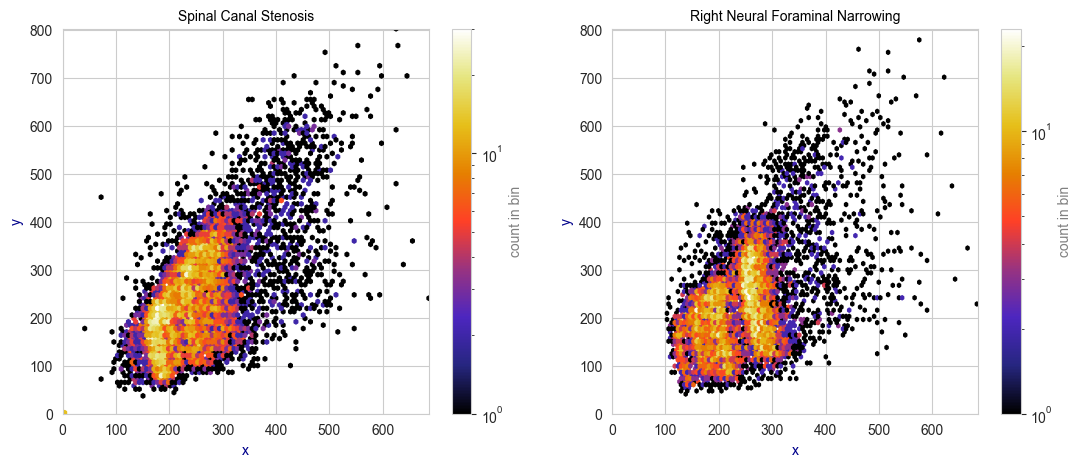

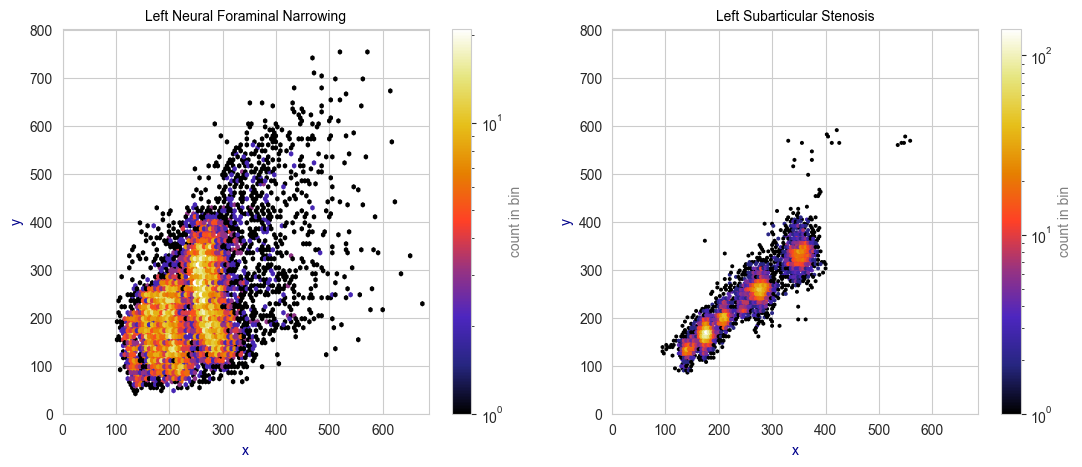

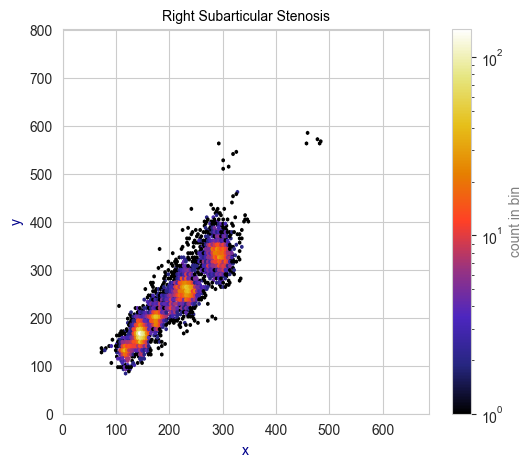

In [20]:
numerical_features_condition = df_train.condition.unique()

n=2
k=1
colorlabels = 'darkblue'

Label_size = 10
Title_size = 10
figs_x=13
figs_y=5
plt.figure(figsize=(figs_x, figs_y))
for i in numerical_features_condition:

    d = df_train[df_train.condition == i] # df_train
    plt.subplot(1, n, k)
    plt.hexbin(data=d, x='x', y='y',  gridsize=100, cmap='CMRmap', bins='log', alpha = 1)

    plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')

    plt.tick_params(axis='x', labelsize=Label_size)
    plt.tick_params(axis='y', labelsize=Label_size)

    plt.xlim([0, df_train.x.max()])
    plt.ylim([0, df_train.y.max()])
    plt.xlabel(f'x', fontsize=Label_size, color = colorlabels)
    plt.ylabel(f'y', fontsize=Label_size, color = colorlabels)

    plt.title(f'{i}', color='black', fontsize=Title_size)
    k=k+1
    if k == (n+1):
        k=1
        plt.show()
        plt.figure(figsize=(figs_x, figs_y))

['L1/L2' 'L2/L3' 'L3/L4' 'L4/L5' 'L5/S1']


C:\Users\GGbond\AppData\Local\Temp\ipykernel_15672\2065256360.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')


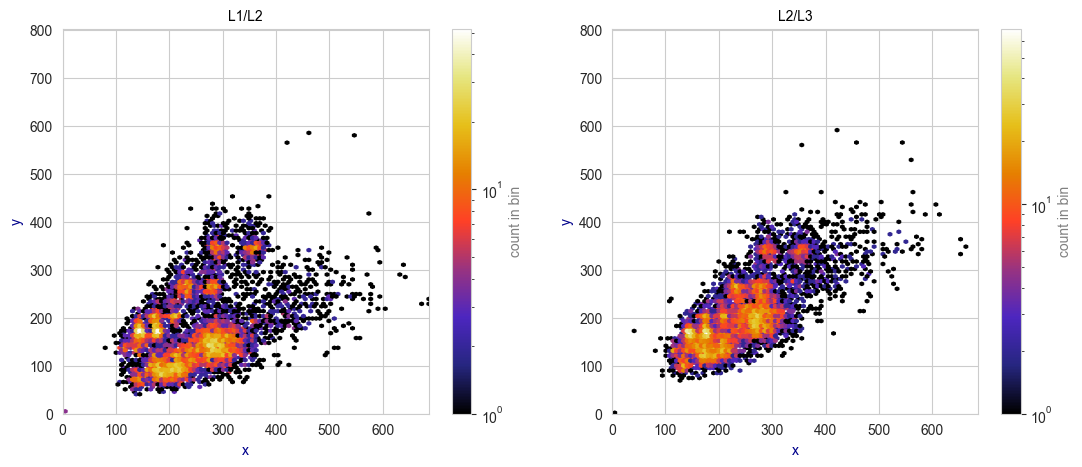

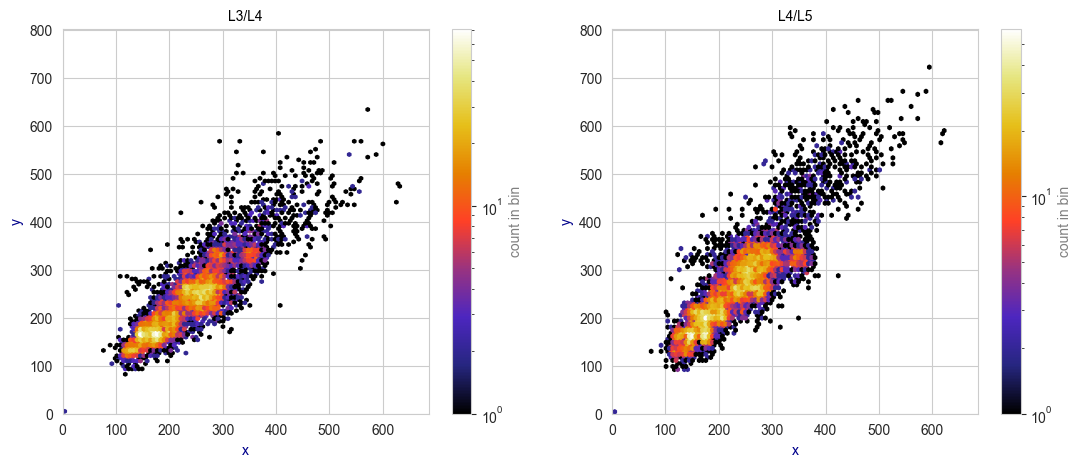

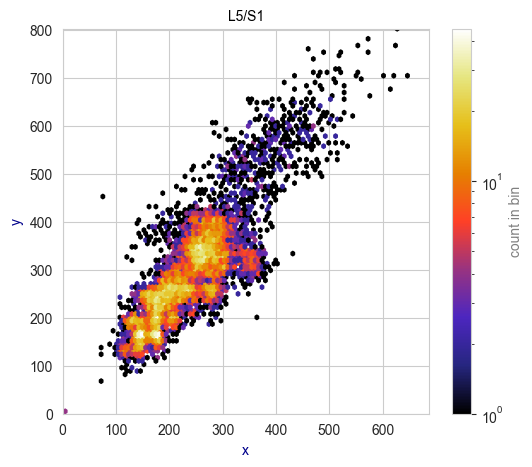

In [19]:
numerical_features_level = df_train.level.unique()
print(numerical_features_level)

n=2
k=1
colorlabels = 'darkblue'

Label_size = 10
Title_size = 10
figs_x=13
figs_y=5
plt.figure(figsize=(figs_x, figs_y))
for i in numerical_features_level:

    d = df_train[df_train.level == i] # df_train
    plt.subplot(1, n, k)
    plt.hexbin(data=d, x='x', y='y',  gridsize=100, cmap='CMRmap', bins='log', alpha = 1)

    plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')

    plt.tick_params(axis='x', labelsize=Label_size)
    plt.tick_params(axis='y', labelsize=Label_size)

    plt.xlim([0, df_train.x.max()])
    plt.ylim([0, df_train.y.max()])
    plt.xlabel(f'x', fontsize=Label_size, color = colorlabels)
    plt.ylabel(f'y', fontsize=Label_size, color = colorlabels)

    plt.title(f'{i}', color='black', fontsize=Title_size)
    k=k+1
    if k == (n+1):
        k=1
        plt.show()
        plt.figure(figsize=(figs_x, figs_y))

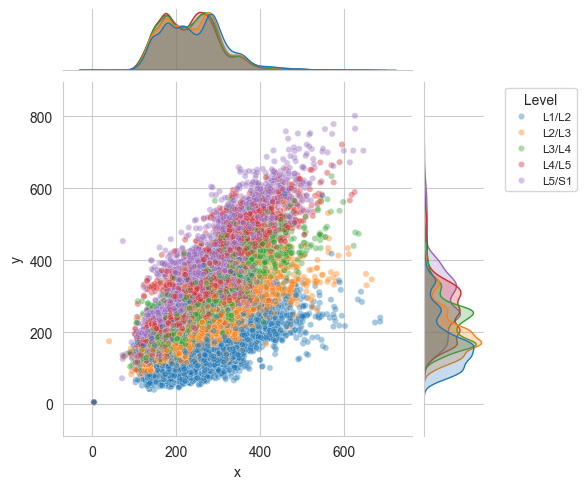

In [8]:
sns.jointplot(data=df_train, x='x', y='y',hue='level', color='red', s = 20, alpha=0.4, height=5)
plt.legend(title='Level', bbox_to_anchor=(1.25, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

****Series_descriptions****

['Sagittal T2/STIR' 'Sagittal T1' 'Axial T2']


C:\Users\GGbond\AppData\Local\Temp\ipykernel_15672\1896836604.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')


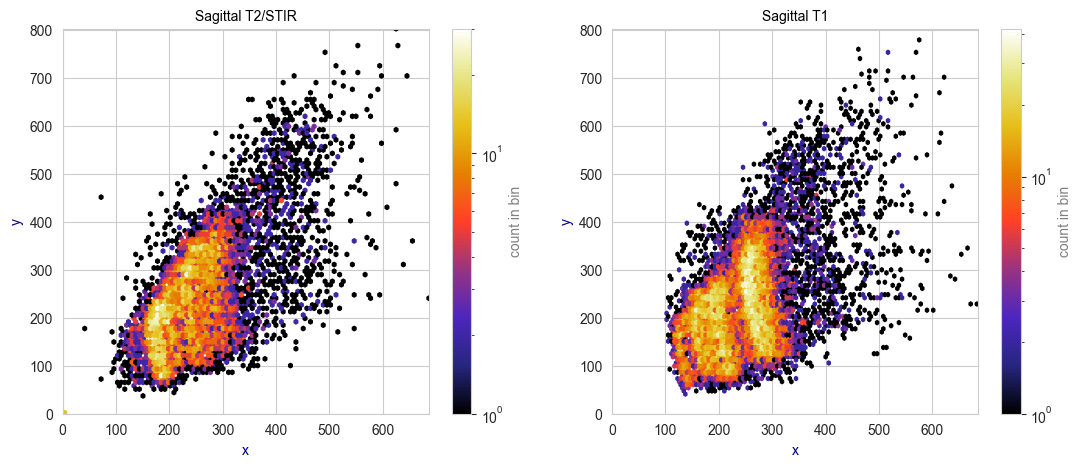

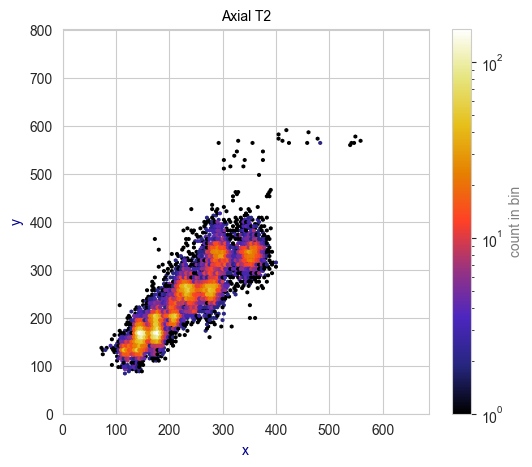

In [23]:
numerical_series_descriptions = df_train.series_description.unique()
print(numerical_series_descriptions)

n=2
k=1
colorlabels = 'darkblue'

Label_size = 10
Title_size = 10
figs_x=13
figs_y=5
plt.figure(figsize=(figs_x, figs_y))
for i in numerical_series_descriptions:

    d = df_train[df_train.series_description == i] # df_train
    plt.subplot(1, n, k)
    plt.hexbin(data=d, x='x', y='y',  gridsize=100, cmap='CMRmap', bins='log', alpha = 1)

    plt.colorbar().set_label(label='count in bin',size=10, color  = 'grey')

    plt.tick_params(axis='x', labelsize=Label_size)
    plt.tick_params(axis='y', labelsize=Label_size)

    plt.xlim([0, df_train.x.max()])
    plt.ylim([0, df_train.y.max()])
    plt.xlabel(f'x', fontsize=Label_size, color = colorlabels)
    plt.ylabel(f'y', fontsize=Label_size, color = colorlabels)

    plt.title(f'{i}', color='black', fontsize=Title_size)
    k=k+1
    if k == (n+1):
        k=1
        plt.show()
        plt.figure(figsize=(figs_x, figs_y))

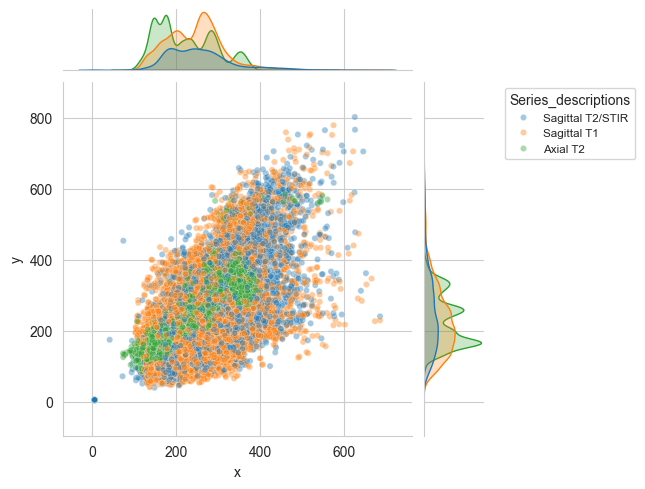

In [9]:
sns.jointplot(data=df_train, x='x', y='y',hue='series_description', color='red', s = 20, alpha=0.4, height=5)
plt.legend(title='Series_descriptions', bbox_to_anchor=(1.25, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()